In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv('employee_data.csv')

In [101]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [102]:
df.sample(6)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
1089,151,IT,NaN,NaN,2,NaN,medium,0.401192,Left,3.0
12422,198,IT,NaN,0.963460,4,NaN,high,0.570155,Employed,2.0
1242,255,procurement,NaN,0.824835,5,NaN,medium,0.890563,Left,5.0
10153,201,sales,NaN,0.636280,4,NaN,medium,0.572226,Employed,3.0
6505,156,engineering,1.0,0.614049,3,NaN,medium,0.673462,Employed,3.0
7401,148,engineering,NaN,0.520301,3,NaN,low,0.810267,Employed,3.0


In [103]:
df.shape

(14249, 10)

In [104]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [105]:
df.drop_duplicates(inplace=True)
df.shape

(14221, 10)

In [106]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

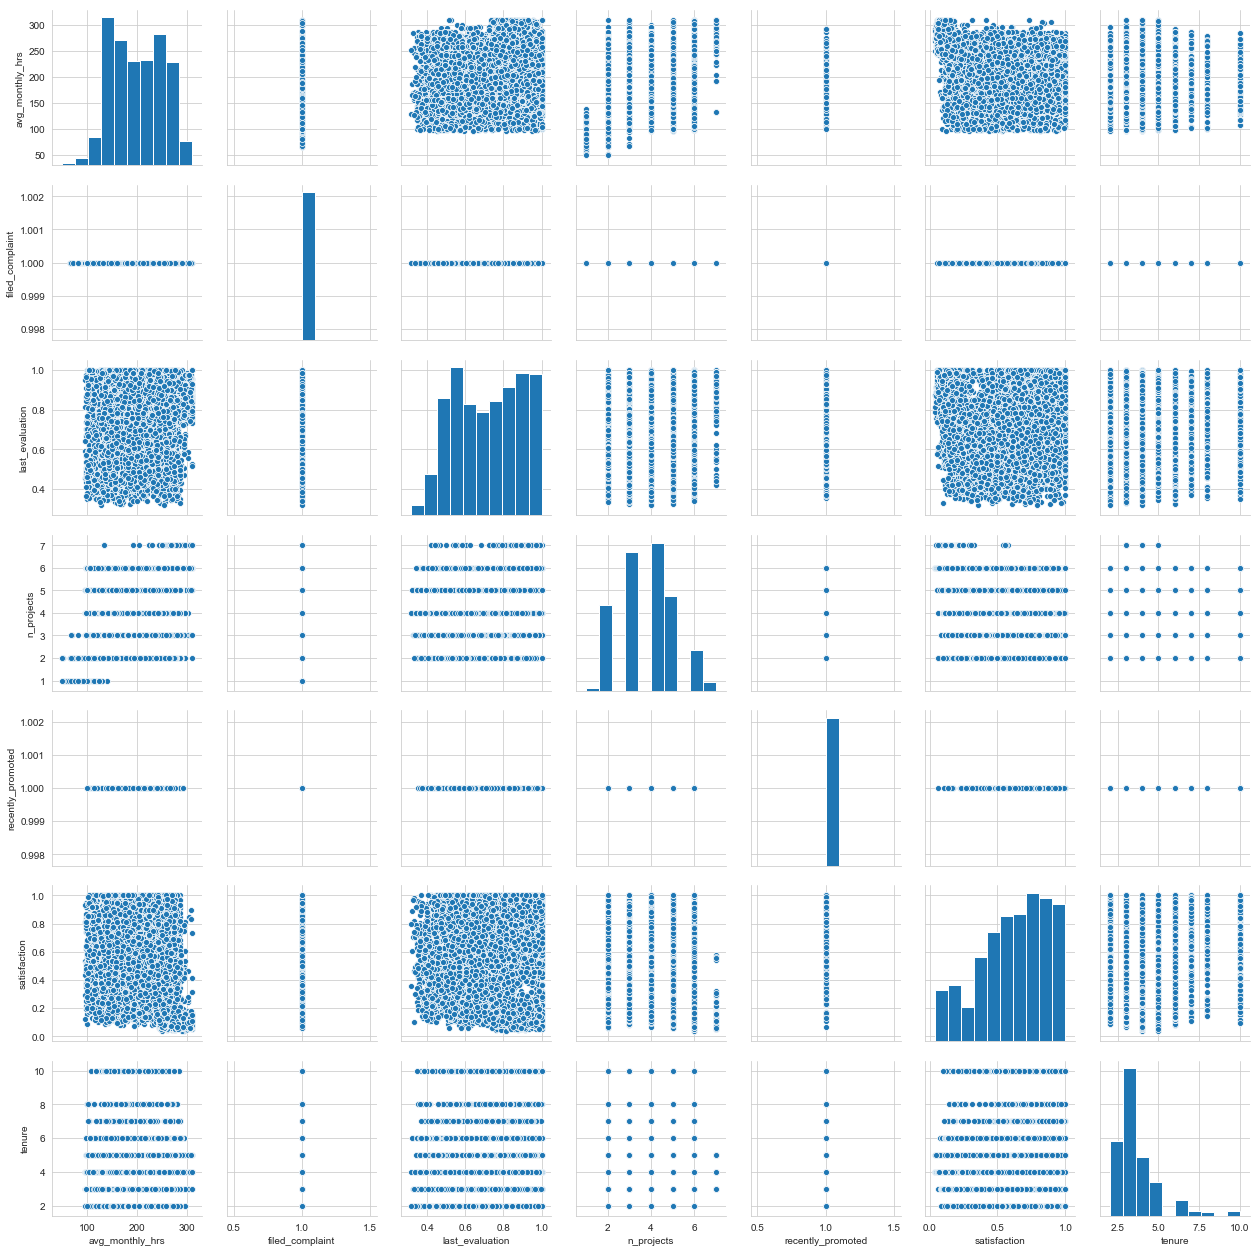

In [107]:
sns.pairplot(df)

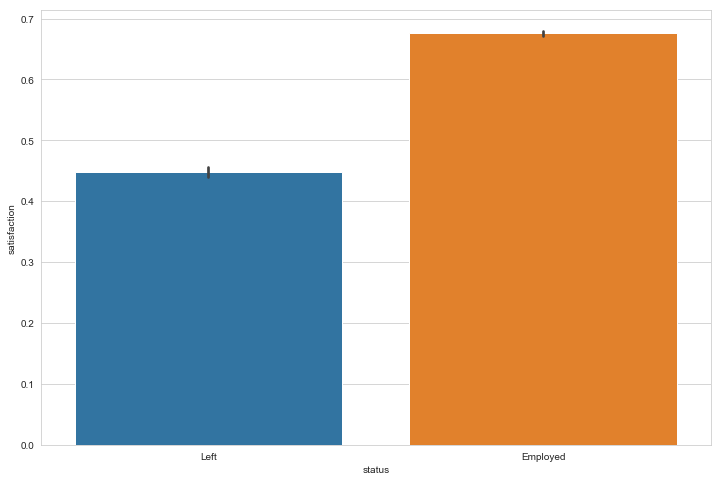

In [108]:
plt = plt.figure(figsize=(12,8))
sns.barplot(x='status', y='satisfaction', data=df)

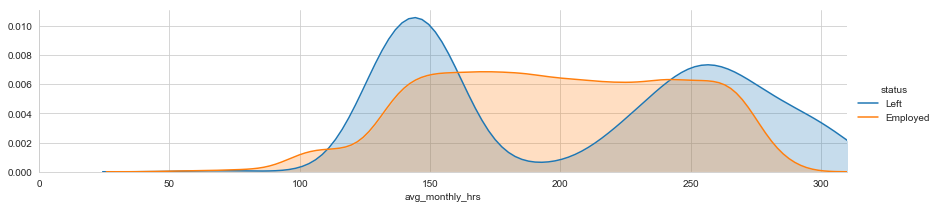

In [109]:
facet = sns.FacetGrid(df, hue='status', aspect=4)
facet.map(sns.kdeplot, 'avg_monthly_hrs', shade=True)
facet.set(xlim=(0, df['avg_monthly_hrs'].max()))
facet.add_legend()

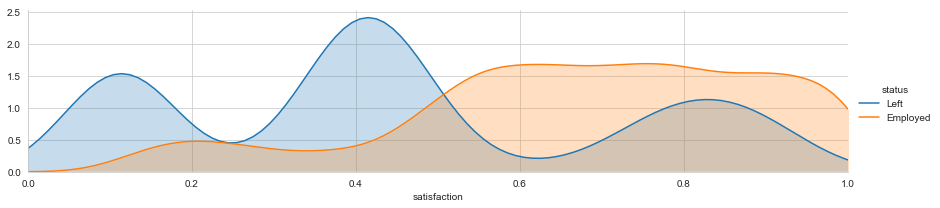

In [110]:
facet = sns.FacetGrid(df, hue='status', aspect=4)
facet.map(sns.kdeplot, 'satisfaction', shade=True)
facet.set(xlim=(0, df['satisfaction'].max()))
facet.add_legend()

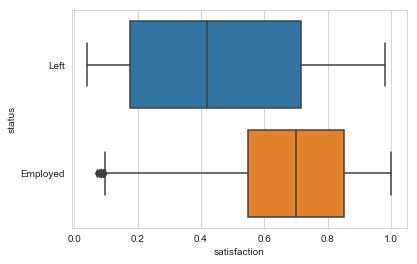

In [111]:
sns.boxplot(y='status', x = 'satisfaction', data=df)
plt.show()

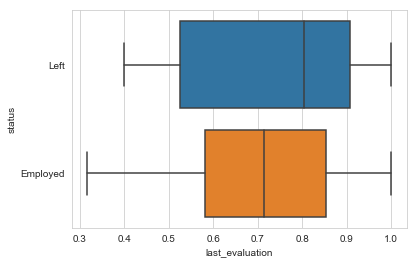

In [112]:
sns.boxplot(y='status', x='last_evaluation',data=df)
plt.show()

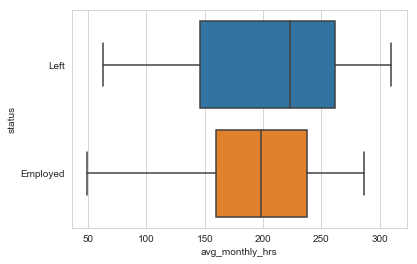

In [113]:
sns.boxplot(y='status', x='avg_monthly_hrs',data=df)
plt.show()

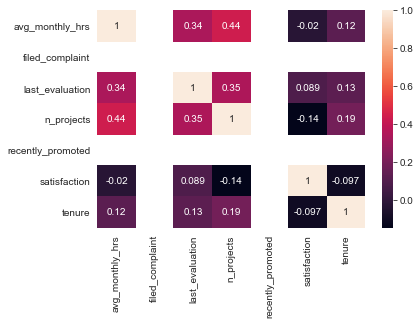

In [114]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [115]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12165
last_evaluation       1504
n_projects               0
recently_promoted    13921
salary                   0
satisfaction           153
status                   0
tenure                 153
dtype: int64

In [116]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


In [117]:
df['filed_complaint'].replace(np.nan, 0, inplace=True)
df['recently_promoted'].replace(np.nan, 0, inplace=True)

In [118]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


In [119]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1504
n_projects              0
recently_promoted       0
salary                  0
satisfaction          153
status                  0
tenure                153
dtype: int64

In [120]:
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [121]:
df['department'].replace('information_technology', 'IT', inplace=True)

In [122]:
df = df[df['department'] != 'temp']

In [123]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [124]:
df['department'].fillna('missing', inplace=True)

In [125]:
df['eval_missing'] = df['last_evaluation'].isnull().astype(int)

In [126]:
df['last_evaluation'].fillna(0, inplace=True)

In [127]:
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
eval_missing         0
dtype: int64

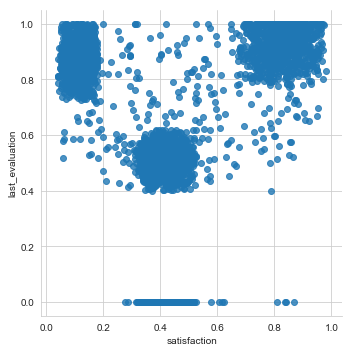

In [128]:
#plt = plt.figure(figsize=(8,10))
sns.lmplot(x='satisfaction', y='last_evaluation', data = df[df['status']=='Left'], fit_reg=False)

In [129]:
df['unhappy'] = (df['satisfaction'] < 0.2).astype(int)

In [130]:
df['underperformer'] = ((df['last_evaluation'] < 0.6) & (df['eval_missing'] == 0)).astype(int)

In [131]:
df['overachiever'] = ((df['last_evaluation'] > 0.8) & (df['satisfaction'] > 0.65)).astype(int)

In [132]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,eval_missing,unhappy,underperformer,overachiever
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0,0,1
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,0,1,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0,0,1


In [133]:
status_mapping = {'Left' : 1, 'Employed' : 0}

df['status'] = df['status'].map(status_mapping)

In [134]:
categorical_features = ['department', 'salary']

df = pd.get_dummies(df, columns = categorical_features)

In [135]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,eval_missing,unhappy,...,department_management,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [136]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [137]:
y = df['status']
X = df.drop('status', axis=1)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = df.status)

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11254, 25), (2814, 25), (11254,), (2814,))

In [166]:
pipelines = {
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
    'dt' : make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=123))
}

In [167]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
               oob_score=False, random_state=123, verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=

In [168]:
pipelines['gb'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(criterion='friedman_mse', init=None,
                 learning_rate=0.1, loss='deviance', max_depth=3,
                 max_features=None, max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=2,
                 min_weight_fraction_leaf=0.0, n_estimators=100,
                 n_iter_no_change=None, presort='auto', random_state=123,
                 subsample=1.0, tol=0.0001, validation_fraction=0.1,
                 verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes

In [169]:
pipelines['dt'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, presort=False, random_state=123,
               splitter='best'))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=123,
             splitter='best'),
 'standardscaler__copy': True,
 '

In [170]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [78,80,82],
    'randomforestclassifier__max_features' : [0.85,0.90,0.95]
}

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100,150,200],
    'gradientboostingclassifier__max_depth' : [1,2,3,4,5],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1,0.2]
}

dt_hyperparameters = {
    'decisiontreeclassifier__max_depth': np.linspace(1, 32, 32, endpoint=True),
    'decisiontreeclassifier__min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'decisiontreeclassifier__min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
#    'decisiontreeclassifier__max_features': list(range(1,df.shape[1]))
    
    
}

In [171]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
   'dt' : dt_hyperparameters
}

In [172]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    
    print('{0} has been fitted'.format(name))

rf has been fitted
gb has been fitted
dt has been fitted


In [177]:
for name, model in fitted_models.items():
    print(name, ", Score: ", model.best_score_, ", Params:", model.best_params_)
    print('  ')

rf , Score:  0.9800959658787987 , Params: {'randomforestclassifier__max_features': 0.9, 'randomforestclassifier__n_estimators': 80}
  
gb , Score:  0.9760973875955216 , Params: {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 200}
  
dt , Score:  0.8399680113737338 , Params: {'decisiontreeclassifier__max_depth': 2.0, 'decisiontreeclassifier__min_samples_leaf': 0.1, 'decisiontreeclassifier__min_samples_split': 0.1}
  


In [187]:
from sklearn.metrics import accuracy_score

In [190]:
for name, model in fitted_models.items():
    predict = model.predict(X_test)
    accuracy_score(y_test, predict)

In [191]:
unseen_data = pd.read_csv('unseen_raw_data.csv')

In [192]:
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,228,management,NaN,0.735618,2,NaN,high,0.805661,3.0
1,229,product,NaN,1.000000,4,NaN,low,0.719961,4.0
2,196,sales,1.0,0.557426,4,NaN,low,0.749835,2.0
3,207,IT,NaN,0.715171,3,NaN,high,0.987447,3.0
4,129,management,NaN,0.484818,2,NaN,low,0.441219,3.0


In [194]:
def clean_data(df):
    df = df.drop_duplicates()
    df = df[df.department != 'temp']
    df['filed_complaint'] = df.filed_complaint.fillna(0)
    df['recently_promoted'] = df.recently_promoted.fillna(0)
    df.department.replace('information_technology', 'IT', inplace=True)
    df['department'].fillna('Missing', inplace=True)
    df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)
    df.last_evaluation.fillna(0, inplace=True)
    return df

In [195]:
def engineer_features(df):
    df['underperformer'] = \
    ((df['last_evaluation'] < 0.6) & (df['last_evaluation_missing'] == 0)).astype(int)

    df['unhappy'] = (df['satisfaction'] < 0.2).astype(int)

    df['overachiever'] = \
    ((df['last_evaluation'] > 0.8) & (df['satisfaction'] > 0.7)).astype(int)
    
    categorical_feats = df.select_dtypes(include=['object']).columns.tolist()
    df = pd.get_dummies(df, columns= categorical_feats)
    
    return df

In [196]:
clean_data = clean_data(unseen_data)

In [197]:
preprocessed_data = engineer_features(clean_data)

In [198]:
preprocessed_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,228,0.0,0.735618,2,0.0,0.805661,3.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,229,0.0,1.000000,4,0.0,0.719961,4.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,196,1.0,0.557426,4,0.0,0.749835,2.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,207,0.0,0.715171,3,0.0,0.987447,3.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,129,0.0,0.484818,2,0.0,0.441219,3.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [199]:
new_prediction = model.predict(preprocessed_data)

In [208]:
new_prediction[:15]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)